In [1]:
from model import Neuron
from model import Layer
from model import Network
import numpy as np
first_neuron = Neuron(np.random.uniform(-0.5, 0.5, 2).tolist(), np.random.uniform(-0.1, 0.1), 0.1)

second_neuron = Neuron(np.random.uniform(-0.5, 0.5, 2).tolist(), np.random.uniform(-0.1, 0.1), 0.1)

third_neuron = Neuron(np.random.uniform(-0.5, 0.5, 2).tolist(), np.random.uniform(-0.1, 0.1), 0.1)
layer = Layer([first_neuron, second_neuron, third_neuron])

output_layer = Layer([
    Neuron(np.random.uniform(-0.5, 0.5, 3).tolist(), np.random.uniform(-0.1, 0.1), 0.1)
    ])


network = Network(layer, output_layer)


In [2]:


X = np.array([
    [0, 0],  
    [0, 1],  
    [1, 0],  
    [1, 1]   
])

y = np.array([0, 1, 1, 0])

mse_history = []
accuracy_history = []

for epoch in range(1000):
    total_error = 0
    correct = 0  # licznik poprawnych klasyfikacji
    
    for i in range(len(X)):
        prediction = network.forward(X[i])
        
        # Błąd dla każdego wyjścia (dwa neurony)
        error = [y[i] - prediction[j] for j in range(len(prediction))]
        total_error += sum(e ** 2 for e in error)
        
        # Predykcja klasy vs. prawdziwa klasa
        predicted_class = np.argmax(prediction)
        true_class = np.argmax(y[i])
        if predicted_class == true_class:
            correct += 1

        # Backpropagation
        network.backward(error)

    mse = total_error / len(X)
    accuracy = correct / len(X)

    mse_history.append(mse)
    accuracy_history.append(accuracy)

    print(f"Epoch {epoch+1} - MSE: {mse:.6f} | Accuracy: {accuracy:.2%}")


Epoch 1 - MSE: 0.251017 | Accuracy: 100.00%
Epoch 2 - MSE: 0.251345 | Accuracy: 100.00%
Epoch 3 - MSE: 0.251702 | Accuracy: 100.00%
Epoch 4 - MSE: 0.252090 | Accuracy: 100.00%
Epoch 5 - MSE: 0.252511 | Accuracy: 100.00%
Epoch 6 - MSE: 0.252970 | Accuracy: 100.00%
Epoch 7 - MSE: 0.253467 | Accuracy: 100.00%
Epoch 8 - MSE: 0.254008 | Accuracy: 100.00%
Epoch 9 - MSE: 0.254595 | Accuracy: 100.00%
Epoch 10 - MSE: 0.255232 | Accuracy: 100.00%
Epoch 11 - MSE: 0.255923 | Accuracy: 100.00%
Epoch 12 - MSE: 0.256671 | Accuracy: 100.00%
Epoch 13 - MSE: 0.257483 | Accuracy: 100.00%
Epoch 14 - MSE: 0.258361 | Accuracy: 100.00%
Epoch 15 - MSE: 0.259311 | Accuracy: 100.00%
Epoch 16 - MSE: 0.260337 | Accuracy: 100.00%
Epoch 17 - MSE: 0.261446 | Accuracy: 100.00%
Epoch 18 - MSE: 0.262642 | Accuracy: 100.00%
Epoch 19 - MSE: 0.263932 | Accuracy: 100.00%
Epoch 20 - MSE: 0.265320 | Accuracy: 100.00%
Epoch 21 - MSE: 0.266812 | Accuracy: 100.00%
Epoch 22 - MSE: 0.268414 | Accuracy: 100.00%
Epoch 23 - MSE: 0.2

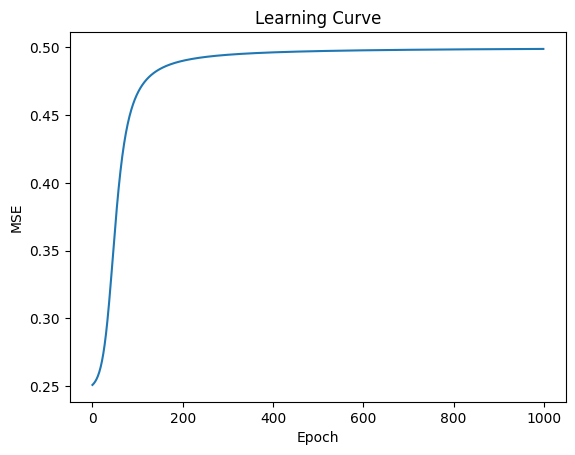

In [3]:
import matplotlib.pyplot as plt

plt.plot(mse_history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.show()
